In [3]:
using LaTeXStrings
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=200.0)
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
using Optim
using Distributions
import Random

using Revise
using DeconvolveDistribution
using DeconvolveDistribution: coefs, ExpoSpline
;

In [4]:
# simulate some data
n = 400
F_X = MixtureModel([Normal(-1, 1), Normal(2, 0.8)], [0.6, 0.4])
σ_distr = Gamma(1.0, 4.0)
Random.seed!(1)
X = rand(F_X, n)
σ = rand(σ_distr, n)
U_distr = Normal.(0.0, σ)
U = rand.(U_distr)
W = X .+ U
;

In [5]:
# estimate F_X from simulated data
n_xx = 100
F_xx = collect(range(-8.0, stop=8.0, length=n_xx))
num_t = 50
h = 0.3
;

In [6]:
decon_settings = DeconvolveDistribution.FourierDeconv(h, F_xx, num_t)
decon_distr = DeconvolveDistribution.decon(decon_settings, W, U_distr)
;

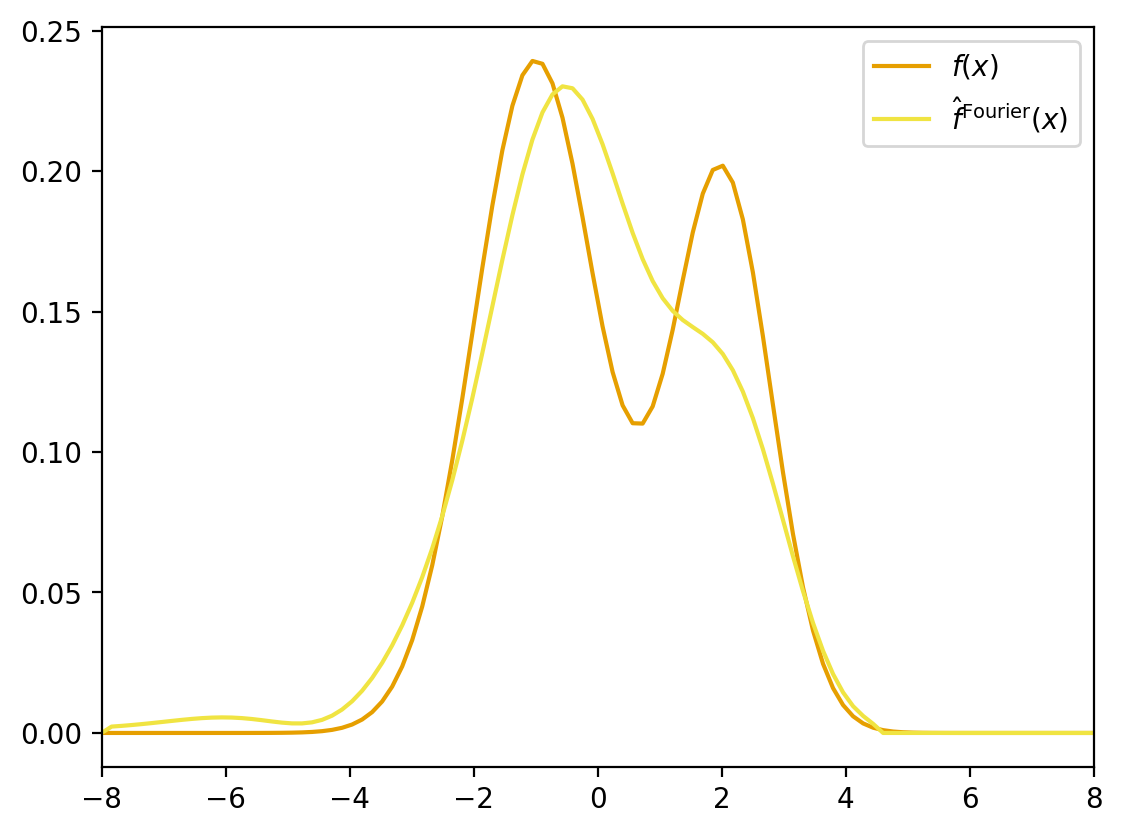

PyObject <matplotlib.legend.Legend object at 0x155b7c400>

In [7]:
plt.plot(F_xx, pdf.(F_X, F_xx), color=cbbPalette[1], label=L"f(x)")

fhat_decon_distr = pdf.(decon_distr, F_xx)
plt.plot(F_xx, fhat_decon_distr, color=cbbPalette[4], label=L"\hat{f}^{\mathrm{Fourier}}(x)")

# plt.plt[:hist](rand(decon_distr, 10_000), bins=100, normed=true, alpha=0.2)
plt.xlim(-8, 8)
plt.legend(loc="top left")

# Plugin-in method

In [8]:
U_distr[5]

Normal{Float64}(μ=0.0, σ=3.490075626156023)

In [10]:
import FastGaussQuadrature
num_t = 50
quad_nodes, t_weight = FastGaussQuadrature.gausslegendre(num_t)
htt = (quad_nodes .+ 1.0) ./ 2.0
h = 8.0
tt = htt ./ h
# equation 15
integral = 0.0
for k in 1:length(U_distr)
    for (it,ht) in enumerate(htt)
        w = t_weight[it] # quadrature weight
        integral += w * abs2(DeconvolveDistribution.ϕK(ht)) / abs2(cf(U_distr[k], ht/h))
    end
end
integral

286.83983168745686

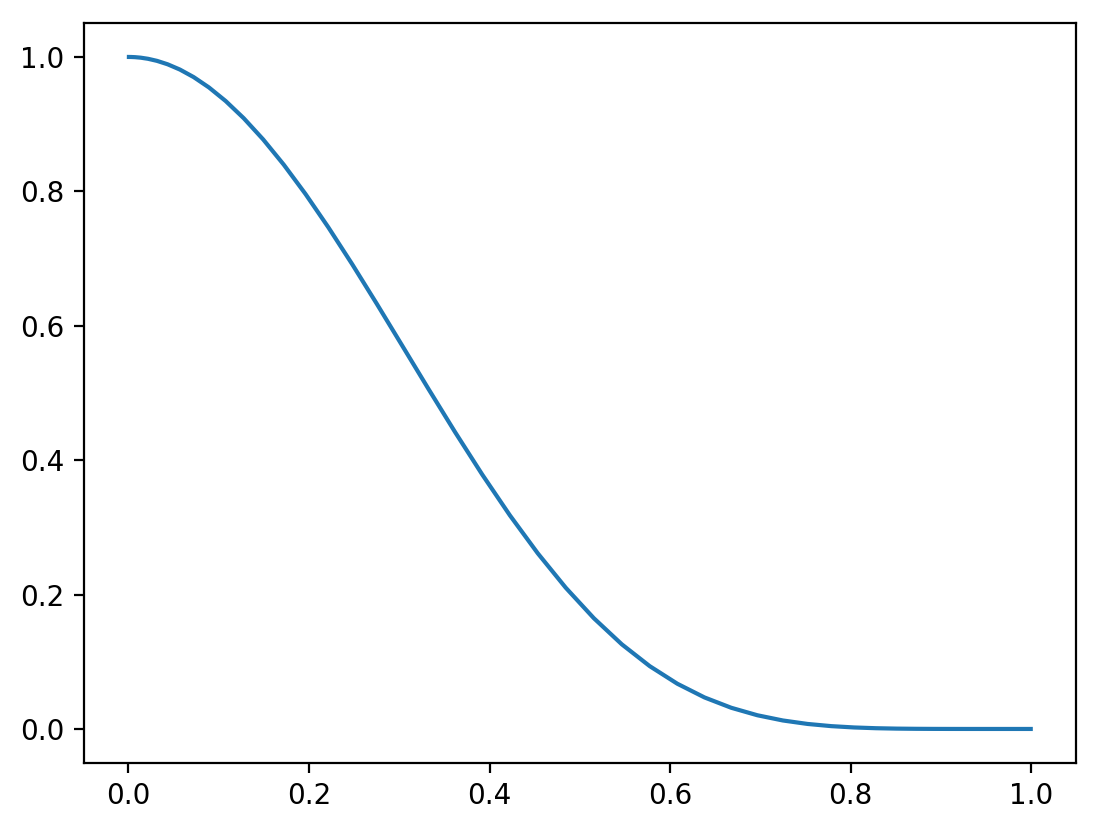

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15c624940>

In [12]:
k = 5
h = 8.0
plt.plot(htt, @. abs2(DeconvolveDistribution.ϕK(htt)) / abs2(cf(U_distr[k], htt/h)))